# Berkeley BSDS500 segmentation dataset

This code shows the handling and preprocessing of the Berkeley BSDS500 segmentation dataset for edge detection.

### References:

[<a name="ref1">1</a>]. P. Arbeláez, M. Maire, C. Fowlkes, and J. Malik, “Contour Detection and Hierarchical Image Segmentation,” *IEEE Transactions on Pattern Analysis and Machine Intelligence*, vol. 33, no. 5, pp. 898–916, May 2011, doi: 10.1109/TPAMI.2010.161.

[<a name="ref2">2</a>]. N. Usuyama and K. Chahal, "UNet/FCN PyTorch," GitHub Repository, 2018. Available online: [https://github.com/usuyama/pytorch-unet](https://github.com/usuyama/pytorch-unet).

[<a name="ref3">3</a>]. I. Ocak and O. Tepencelik, "Edge Detection Using U-Net Architecture," GitHub Repository, 2020. Available online: [https://github.com/iocak28/UNet_edge_detection](https://github.com/iocak28/UNet_edge_detection).

In [45]:
%matplotlib inline

In [46]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import scipy
from torch.utils.data import DataLoader

In [47]:
import sys
import importlib

sys.path.append('../../src')
from preprocessing import bsds500
importlib.reload(bsds500);

from plotting import plot_images, plot_metrics
importlib.reload(plot_images);
importlib.reload(plot_metrics);

In [48]:
import os
data_dir = os.path.abspath(os.path.join('..', '..', 'data'))
output_dir = os.path.abspath(os.path.join('..', '..', 'output'))
models_dir = os.path.abspath(os.path.join('..', '..', 'models'))

In [49]:
xfolder = data_dir + '/training/BSDS500/images/'
yfolder = data_dir + '/training/BSDS500/ground_truth/'

## 1. 1D or 3D input image data

In [50]:
filename = 'train/8143'

In [51]:
input_channels = 3  # Set to 1 for grayscale, 3 for RGB

image = Image.open(xfolder + filename + '.jpg')
label = scipy.io.loadmat(yfolder + filename + '.mat')['groundTruth'][0][0][0][0][1]

image = image.convert("L") if input_channels == 1 else image.convert("RGB")
label = Image.fromarray((label * 255).astype(np.uint8))

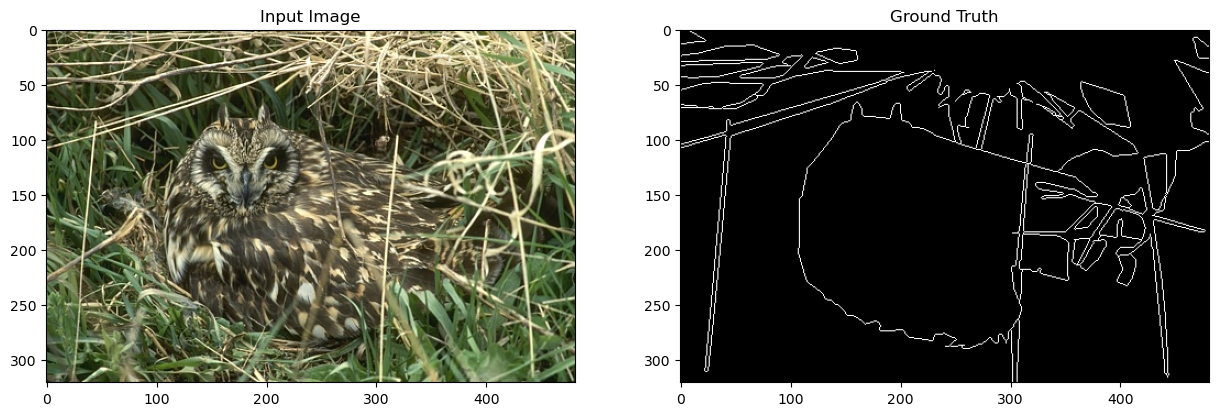

In [52]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(15, 10))

ax0.imshow(image, cmap='gray') if input_channels == 1 else ax0.imshow(image)
ax0.set_title('Input Image')
ax1.imshow(label, cmap='gray')
ax1.set_title('Ground Truth')
plt.show()

## 2. Image transformation, Dataloaders and Data augmentation

In [53]:
# n_rotations = 4
# rotations = [i * (360 / n_rotations) for i in range(n_rotations)]  # [0, 90, 180, 270]
rotations = [0, 45, 90, 315]
# rotations = [0]

image_transform = bsds500.image_transformation
label_transform = bsds500.label_transformation


input_channels = 1  # Set to 1 for grayscale, 3 for RGB

train_set = bsds500.BSDS500Dataset(
    xfolder + 'train/', 
    yfolder + 'train/', 
    image_transform(), 
    label_transform(), 
    rotations=rotations, 
    input_channels=input_channels
    )
val_set = bsds500.BSDS500Dataset(
    xfolder + 'val/', 
    yfolder + 'val/', 
    image_transform(), 
    label_transform(), 
    rotations=rotations, 
    input_channels=input_channels
)
test_set = bsds500.BSDS500Dataset(
    xfolder + 'test/', 
    yfolder + 'test/', 
    image_transform(noise=False), 
    label_transform(noise=False), 
    rotations=[0], 
    input_channels=input_channels
)

In [54]:
batch_size = 4
dataloaders = {
    'train': DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=0),
    'val': DataLoader(val_set, batch_size=batch_size, shuffle=True, num_workers=0)
}

image_datasets = {'train': train_set, 'val': val_set}
dataset_sizes = {x: len(image_datasets[x]) for x in image_datasets.keys()}
dataset_sizes

{'train': 800, 'val': 400}

torch.Size([4, 1, 320, 480]) torch.Size([4, 1, 320, 480])


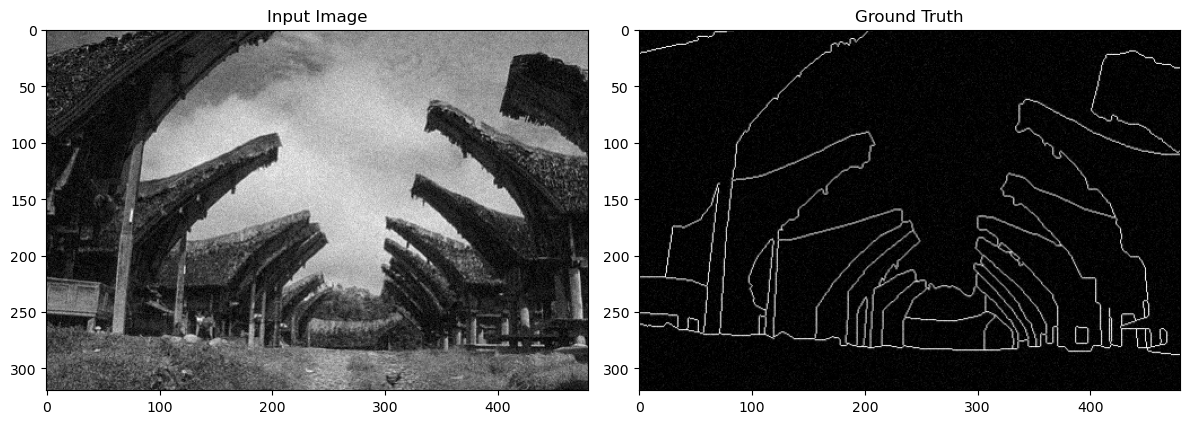

In [55]:
inputs, labels = next(iter(dataloaders['train']))
print(inputs.shape, labels.shape)

this_image = 2
plot_images.plot_input_gt(inputs[this_image], labels[this_image])